In [1]:
import warnings
warnings.filterwarnings('ignore')

# Classify the Size_Categorie using SVM


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('forestfires.csv')
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


# About Data

month : month of the year: 'jan' to 'dec'
        
day : day of the week: 'mon' to 'sun'
        
FFMC : FFMC index from the FWI system: 18.7 to 96.20

DMC : DMC index from the FWI system: 1.1 to 291.3

DC : DC index from the FWI system: 7.9 to 860.6

ISI : ISI index from the FWI system: 0.0 to 56.10

temp : temperature in Celsius degrees: 2.2 to 33.30

RH : relative humidity in %: 15.0 to 100
        
wind : wind speed in km/h: 0.40 to 9.40

rain : outside rain in mm/m2 : 0.0 to 6.4

Size_Categorie : the burned area of the forest ( Small , Large)

## EDA

In [4]:
# Checking Null Values and DType

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

**No Null Values in Data**

In [5]:
# Checking Duplicate Values

df[df.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [6]:
# Removing Duplicate Values

df.drop_duplicates(inplace=True)

In [7]:
df[df.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category


**No Duplicates in Data**

In [8]:
df['size_category'].value_counts()

small    371
large    138
Name: size_category, dtype: int64

In [9]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [10]:
# Renaming columns

df.columns = ['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'fri', 'mon', 'sat', 'sun', 'thu',
       'tue', 'wed', 'apr', 'aug', 'dec', 'feb',
       'jan', 'jul', 'jun', 'mar', 'may', 'nov',
       'oct', 'sep', 'size']

In [11]:
# Describe

df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,fri,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,90.618075,110.235756,547.787623,9.023576,18.865422,44.253438,4.011395,0.020432,12.992908,0.163065,...,0.017682,0.039293,0.003929,0.062868,0.031434,0.104126,0.003929,0.001965,0.029470,0.337917
std,5.555527,63.804112,248.196222,4.585083,5.841083,16.365192,1.800926,0.296261,64.133357,0.369788,...,0.131921,0.194482,0.062622,0.242965,0.174660,0.305724,0.062622,0.044324,0.169285,0.473466
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.610000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,141.300000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.580000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# Correlating 

df.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,fri,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
FFMC,1.000000,0.382925,0.331956,0.531926,0.431744,-0.306262,-0.030409,0.052280,0.040998,0.020889,...,-0.136614,-0.281054,-0.455128,0.033137,-0.041972,-0.074706,-0.036983,-0.088879,-0.005172,0.080444
DMC,0.382925,1.000000,0.681446,0.309459,0.470875,0.062772,-0.104563,0.071017,0.076932,-0.011152,...,-0.177044,-0.319691,-0.106256,0.000617,-0.047759,-0.404974,-0.082312,-0.074642,-0.188126,0.119779
DC,0.331956,0.681446,1.000000,0.229757,0.496608,-0.047971,-0.202856,0.033772,0.051542,-0.001642,...,-0.106347,-0.402201,-0.115871,-0.101518,-0.178719,-0.648890,-0.115010,-0.078927,0.094091,0.538299
ISI,0.531926,0.309459,0.229757,1.000000,0.395858,-0.135955,0.104834,0.062132,0.008429,0.051599,...,-0.162761,-0.250494,-0.103846,0.020932,0.119765,-0.143589,-0.060655,-0.076748,-0.071401,-0.069600
temp,0.431744,0.470875,0.496608,0.395858,1.000000,-0.532503,-0.227754,0.067911,0.099173,-0.077766,...,-0.329774,-0.319901,-0.146547,0.143987,0.052779,-0.342129,-0.045372,-0.053720,-0.052918,0.091428
RH,-0.306262,0.062772,-0.047971,-0.135955,-0.532503,1.000000,0.070721,0.094343,-0.074554,0.069599,...,-0.047670,0.141593,0.171900,0.013808,0.014425,-0.083581,0.087384,-0.035967,-0.072335,-0.061631
wind,-0.030409,-0.104563,-0.202856,0.104834,-0.227754,0.070721,1.000000,0.059332,0.012623,0.121056,...,0.270919,-0.028820,-0.070217,-0.039880,0.010124,0.181610,0.015311,0.012049,-0.053404,-0.180211
rain,0.052280,0.071017,0.033772,0.062132,0.067911,0.094343,0.059332,1.000000,-0.006511,-0.001723,...,-0.009262,-0.013961,-0.004336,-0.012411,-0.012437,-0.019189,-0.004336,-0.003063,-0.012030,-0.049319
area,0.040998,0.076932,0.051542,0.008429,0.099173,-0.074554,0.012623,-0.006511,1.000000,-0.052390,...,0.000706,-0.021205,-0.012737,0.005566,-0.019083,-0.048394,0.006124,-0.008997,-0.017284,0.055191
fri,0.020889,-0.011152,-0.001642,0.051599,-0.077766,0.069599,0.121056,-0.001723,-0.052390,1.000000,...,-0.018868,0.047592,-0.027723,-0.048598,-0.018562,0.041050,0.057284,-0.019584,-0.045470,0.111903


## Visualization

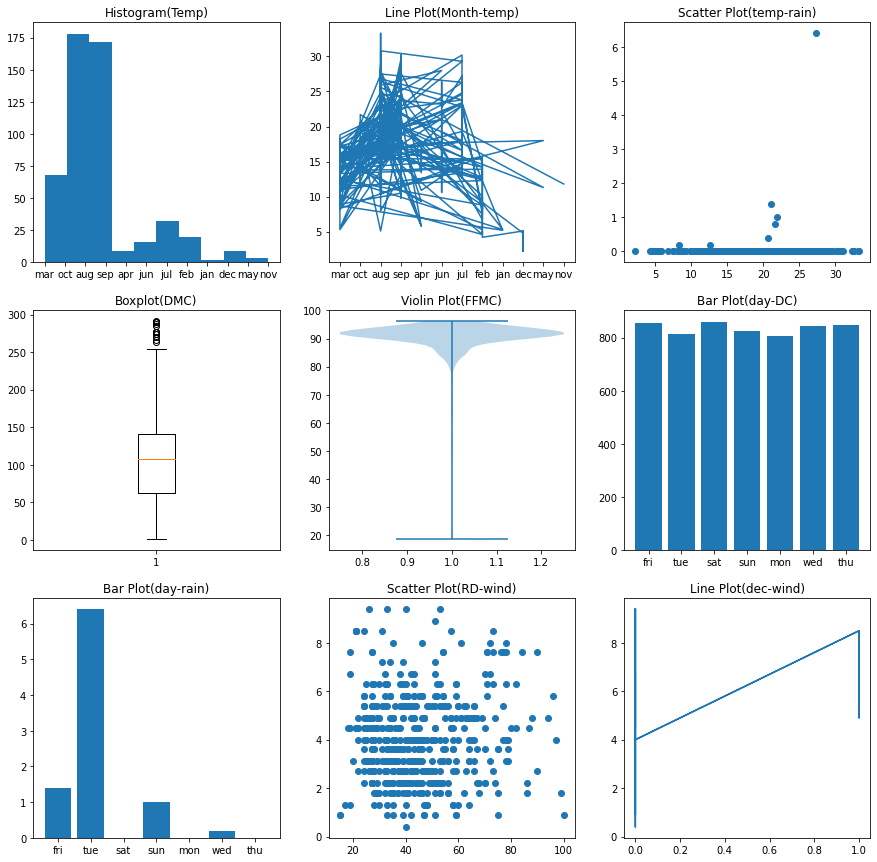

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (15,15))
ax[0,0].hist('month', data = df);ax[0,0].set_title("Histogram(Temp)")
ax[0,1].plot('month', 'temp', data = df);ax[0,1].set_title("Line Plot(Month-temp)")
ax[0,2].scatter('temp','rain', data = df);ax[0,2].set_title("Scatter Plot(temp-rain)")
ax[1,0].boxplot('DMC', data= df);ax[1,0].set_title("Boxplot(DMC)")
ax[1,1].violinplot('FFMC', data = df);ax[1,1].set_title("Violin Plot(FFMC)")
ax[1,2].bar( df['day'],df['DC']);ax[1,2].set_title("Bar Plot(day-DC)")
ax[2,0].bar('day','rain', data = df ); ax[2,0].set_title("Bar Plot(day-rain)")
ax[2,1].scatter('RH','wind', data = df);ax[2,1].set_title('Scatter Plot(RD-wind)')
ax[2,2].plot('dec', 'wind', data = df);ax[2,2].set_title("Line Plot(dec-wind)")
plt.show()

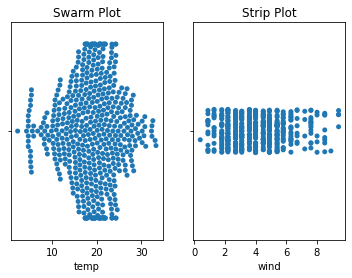

In [14]:
# Swarmplot & Stripplot

plt.subplot(1,2,1)
sns.swarmplot('temp', data = df);plt.title("Swarm Plot")
plt.subplot(1,2,2)
sns.stripplot( 'wind', data = df);plt.title("Strip Plot")
plt.show()

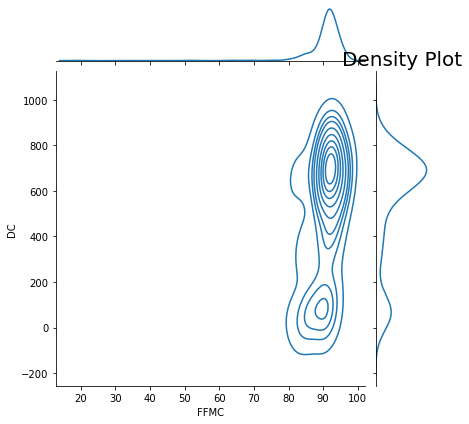

In [15]:
# Density plot

sns.jointplot('FFMC', 'DC', data = df, kind ='kde')
plt.title("Density Plot", size = 20)
plt.show()

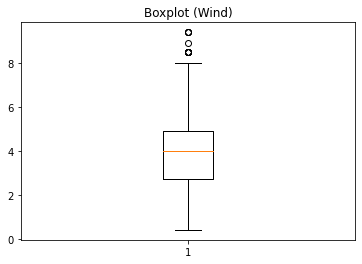

In [16]:
# Boxplot for outlier detection

plt.boxplot('wind', data= df); plt.title("Boxplot (Wind)")
plt.show()

### Converting categorical data into numeric

##### Label Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['size'] = LE.fit_transform(df['size'])

##### Train-Test-Split

In [18]:
from sklearn.model_selection import train_test_split

X , Y = df.iloc[:,2:-1], df.iloc[:,-1]
# print(X)
# print(Y)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify = Y)


##### Standardizing Data

In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## SVM (Support Vector Machine)

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [22]:
svm = SVC(kernel= 'linear', random_state=1, C=0.1)
svm.fit(X_train_std, y_train)

SVC(C=0.1, kernel='linear', random_state=1)

In [23]:
y_pred = svm.predict(X_test_std)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.784


In [24]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [27]:
SVMC = SVC(random_state = 42)
svc_param_grid = {'kernel' : ['rbf', 'sigmoid', 'poly', 'linear'], 'gamma': [1,0.1,0.01,0.001], 'C': [1000,100,10,1], 'tol': [0.001,0.0008,0.0009,0.0011]}
gsSVMC = GridSearchCV(SVMC, param_grid = svc_param_grid, cv = 10, scoring = "accuracy", n_jobs = 6, verbose = 1)

gsSVMC.fit(X_train, Y_train)

svm_best = gsSVMC.best_estimator_

gsSVMC.best_score_

Fitting 10 folds for each of 256 candidates, totalling 2560 fits


0.9944444444444445

In [29]:
clf = SVC()
param_grid = [{'kernel': ['linear', 'rbf'], 'gamma': [0.5,0.1,0.1], 'C': [10,0.1,0.001,0.0001]}]
gsv = GridSearchCV(clf, param_grid, cv = 10, verbose = 30)
gsv.fit(X_train, Y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV 1/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 1/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 2/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 3/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=0.972 total time=   0.0s
[CV 4/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 4/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=0.972 total time=   0.0s
[CV 5/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 5/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=1.000 total time=   0.0s
[CV 6/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 6/10; 1/24] END C=10, gamma

[CV 10/10; 6/24] END C=10, gamma=0.1, kernel=rbf;, score=0.743 total time=   0.0s
[CV 1/10; 7/24] START C=0.1, gamma=0.5, kernel=linear...........................
[CV 1/10; 7/24] END C=0.1, gamma=0.5, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/10; 7/24] START C=0.1, gamma=0.5, kernel=linear...........................
[CV 2/10; 7/24] END C=0.1, gamma=0.5, kernel=linear;, score=0.944 total time=   0.0s
[CV 3/10; 7/24] START C=0.1, gamma=0.5, kernel=linear...........................
[CV 3/10; 7/24] END C=0.1, gamma=0.5, kernel=linear;, score=0.972 total time=   0.0s
[CV 4/10; 7/24] START C=0.1, gamma=0.5, kernel=linear...........................
[CV 4/10; 7/24] END C=0.1, gamma=0.5, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/10; 7/24] START C=0.1, gamma=0.5, kernel=linear...........................
[CV 5/10; 7/24] END C=0.1, gamma=0.5, kernel=linear;, score=1.000 total time=   0.0s
[CV 6/10; 7/24] START C=0.1, gamma=0.5, kernel=linear...........................
[CV 6/1

[CV 9/10; 12/24] END C=0.1, gamma=0.1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 10/10; 12/24] START C=0.1, gamma=0.1, kernel=rbf............................
[CV 10/10; 12/24] END C=0.1, gamma=0.1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 1/10; 13/24] START C=0.001, gamma=0.5, kernel=linear........................
[CV 1/10; 13/24] END C=0.001, gamma=0.5, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/10; 13/24] START C=0.001, gamma=0.5, kernel=linear........................
[CV 2/10; 13/24] END C=0.001, gamma=0.5, kernel=linear;, score=0.917 total time=   0.0s
[CV 3/10; 13/24] START C=0.001, gamma=0.5, kernel=linear........................
[CV 3/10; 13/24] END C=0.001, gamma=0.5, kernel=linear;, score=0.944 total time=   0.0s
[CV 4/10; 13/24] START C=0.001, gamma=0.5, kernel=linear........................
[CV 4/10; 13/24] END C=0.001, gamma=0.5, kernel=linear;, score=0.944 total time=   0.0s
[CV 5/10; 13/24] START C=0.001, gamma=0.5, kernel=linear....................

[CV 1/10; 18/24] END C=0.001, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 2/10; 18/24] START C=0.001, gamma=0.1, kernel=rbf...........................
[CV 2/10; 18/24] END C=0.001, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 3/10; 18/24] START C=0.001, gamma=0.1, kernel=rbf...........................
[CV 3/10; 18/24] END C=0.001, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 4/10; 18/24] START C=0.001, gamma=0.1, kernel=rbf...........................
[CV 4/10; 18/24] END C=0.001, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 5/10; 18/24] START C=0.001, gamma=0.1, kernel=rbf...........................
[CV 5/10; 18/24] END C=0.001, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 6/10; 18/24] START C=0.001, gamma=0.1, kernel=rbf...........................
[CV 6/10; 18/24] END C=0.001, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 7/10; 18/24] START C=0.001, gamma=0.1, kernel=rbf...........................
[CV 

[CV 7/10; 23/24] END C=0.0001, gamma=0.1, kernel=linear;, score=0.800 total time=   0.0s
[CV 8/10; 23/24] START C=0.0001, gamma=0.1, kernel=linear.......................
[CV 8/10; 23/24] END C=0.0001, gamma=0.1, kernel=linear;, score=0.914 total time=   0.0s
[CV 9/10; 23/24] START C=0.0001, gamma=0.1, kernel=linear.......................
[CV 9/10; 23/24] END C=0.0001, gamma=0.1, kernel=linear;, score=0.829 total time=   0.0s
[CV 10/10; 23/24] START C=0.0001, gamma=0.1, kernel=linear......................
[CV 10/10; 23/24] END C=0.0001, gamma=0.1, kernel=linear;, score=0.829 total time=   0.0s
[CV 1/10; 24/24] START C=0.0001, gamma=0.1, kernel=rbf..........................
[CV 1/10; 24/24] END C=0.0001, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 2/10; 24/24] START C=0.0001, gamma=0.1, kernel=rbf..........................
[CV 2/10; 24/24] END C=0.0001, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 3/10; 24/24] START C=0.0001, gamma=0.1, kernel=rbf............

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [10, 0.1, 0.001, 0.0001],
                          'gamma': [0.5, 0.1, 0.1],
                          'kernel': ['linear', 'rbf']}],
             verbose=30)

In [31]:
gsv.best_params_, gsv.best_score_

({'C': 10, 'gamma': 0.5, 'kernel': 'linear'}, 0.9944444444444445)

In [32]:
clf = SVC(kernel = 'linear', C = 10)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, y_pred) * 100
print("Accuracy is: ", acc)
confusion_matrix(Y_test, y_pred)

Accuracy is:  98.0392156862745


array([[ 31,   1],
       [  2, 119]], dtype=int64)

#### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
import pickle

In [34]:
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [35]:
filename = 'finalized_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [36]:
# Prediction for X Dataset

pickle.load(open(filename, 'rb'))

y_pred = classifier.predict(X)

In [37]:
y_pred_ffire = pd.DataFrame({'actual': Y, 'predicted_prob': classifier.predict(X)})
y_pred_ffire

,actual,predicted_prob
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
512,0,0
513,0,0
514,0,0
515,1,1


#### Confusion Matrix

In [39]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y, y_pred)
print(confusion_matrix)

[[137   1]
 [  1 370]]


In [40]:
((139+377)/(139+0+1+377))*100

99.80657640232108

#### Classification Report


In [41]:
from sklearn.metrics import classification_report
print(classification_report(Y, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       138
           1       1.00      1.00      1.00       371

    accuracy                           1.00       509
   macro avg       1.00      1.00      1.00       509
weighted avg       1.00      1.00      1.00       509



### ROC Curve

In [42]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

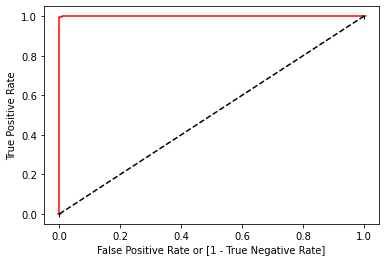

In [43]:
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])
auc = roc_auc_score(Y, y_pred)

plt.plot(fpr, tpr, color = 'red', label = 'logit model(area = %0.2f)' %auc)
plt.plot([0,1],[0,1], 'k--1')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel("True Positive Rate")
plt.show()

In [44]:
## Accuracy

auc

0.9950291026993241

### Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 40)

In [47]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [48]:
model

DecisionTreeClassifier(criterion='entropy', max_depth=3)

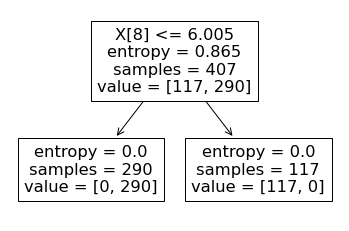

In [49]:
from sklearn import tree

tree.plot_tree(model);

In [51]:
Y_train.value_counts().keys()

Int64Index([1, 0], dtype='int64')

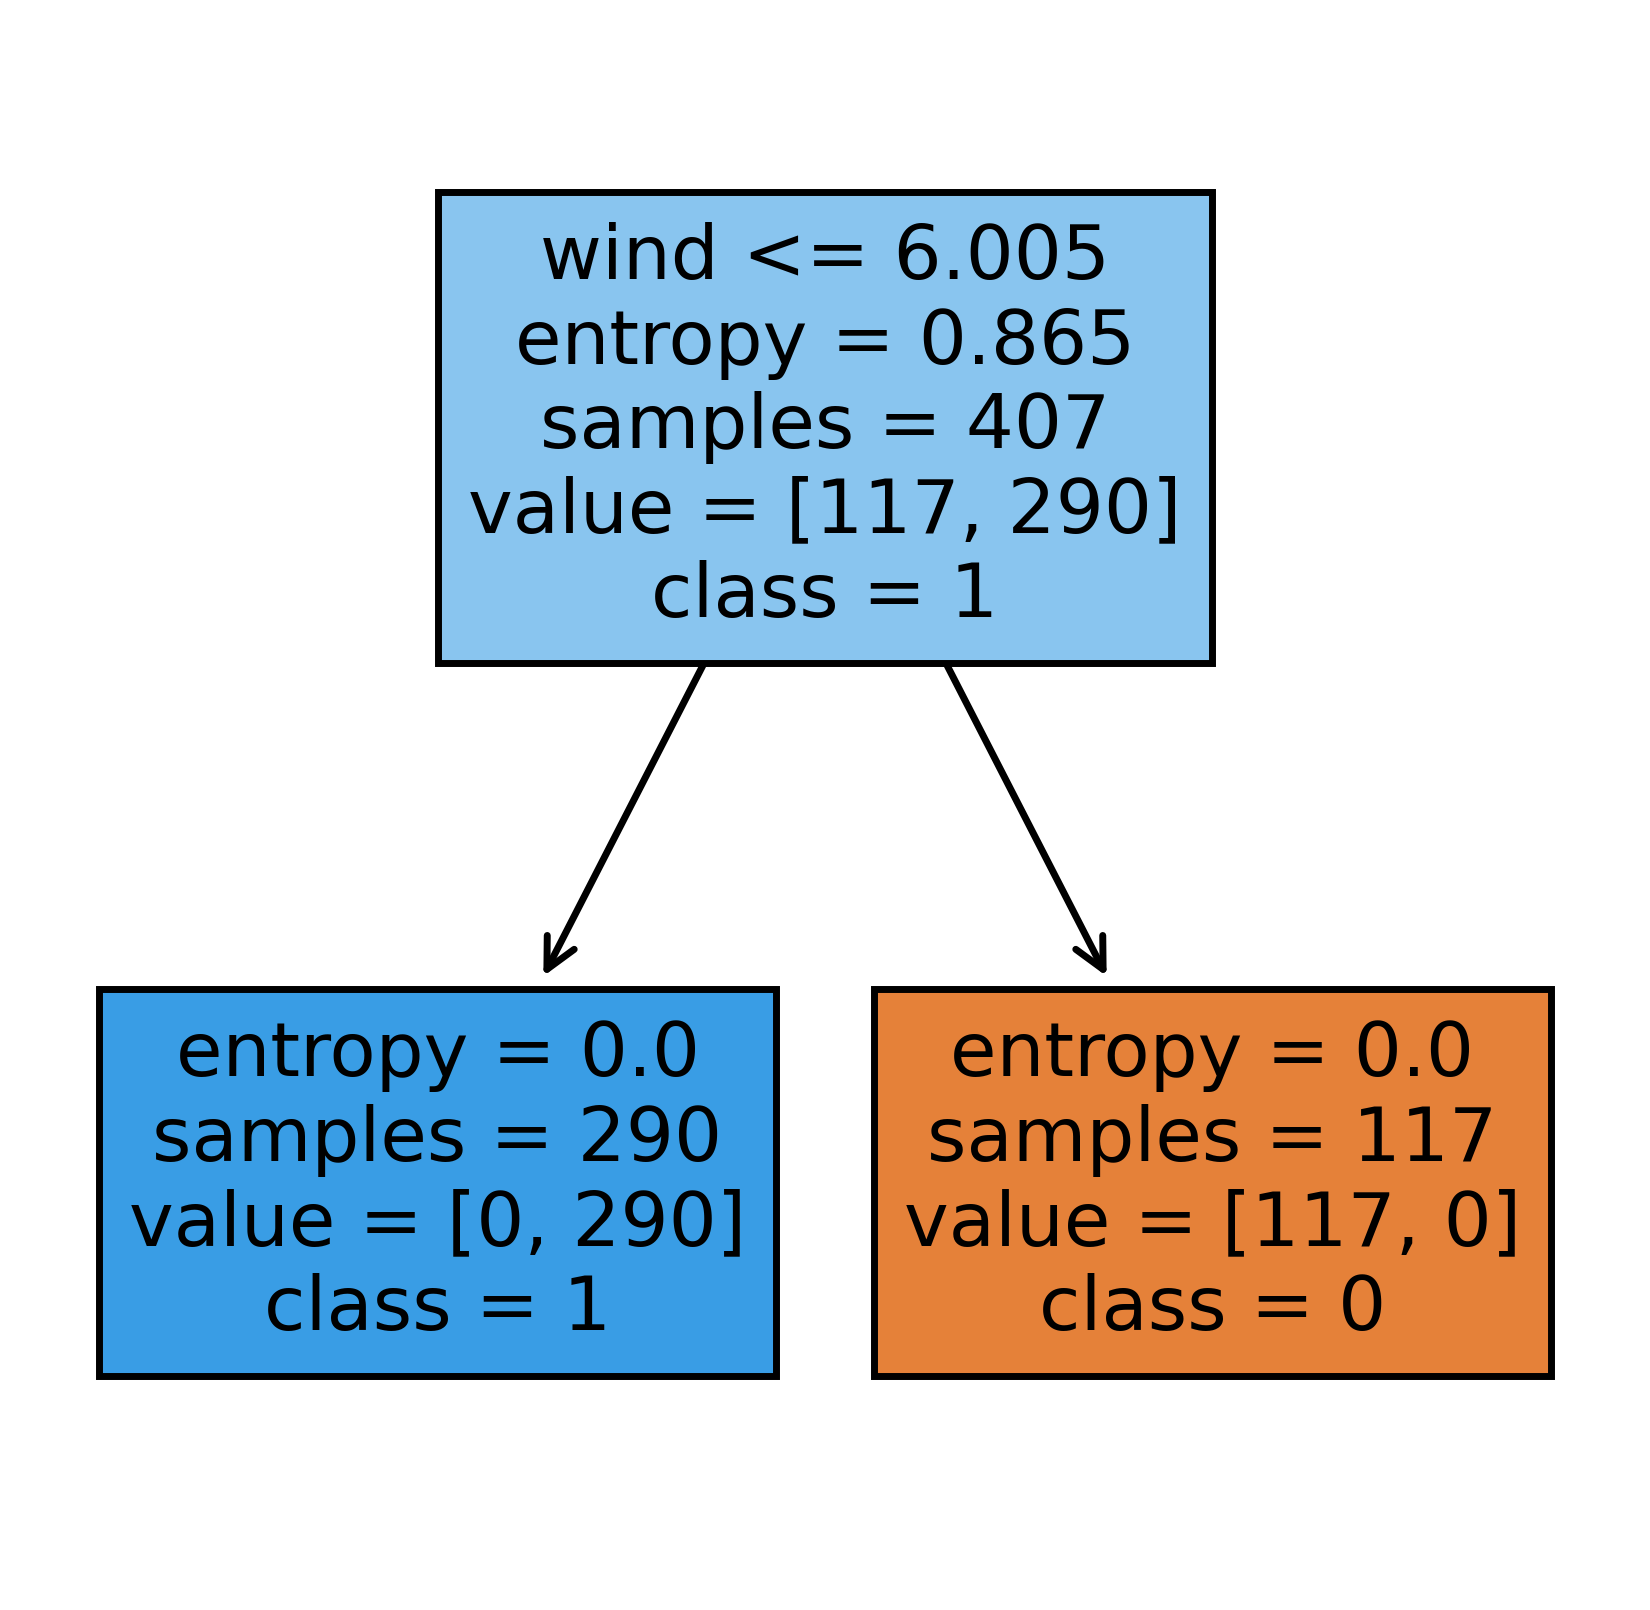

In [52]:
col = (['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'fri', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'apr',
       'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
       'sep'])
cn = ['0','1']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 500)
tree.plot_tree(model, feature_names = col, class_names = cn, filled = True)
plt.show()

In [53]:
# Predicting on test data

preds = model.predict(X_test)    # Predicting on test data set
pd.Series(preds).value_counts()   # Getting the count of each category

1    81
0    21
dtype: int64

In [54]:
Y_test.value_counts()

1    81
0    21
Name: size, dtype: int64

In [55]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [56]:
# Getting the 2 way table to understand the correct and wrong predictions

pd.crosstab(Y_test, preds)

col_0,0,1
size,,
0,21,0
1,0,81


In [57]:
preds, Y_test

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
        1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1]),
 475    1
 357    1
 325    1
 470    1
 249    1
       ..
 256    0
 104    1
 339    1
 504    0
 159    1
 Name: size, Length: 102, dtype: int32)

In [58]:
# Accuracy

from sklearn.metrics import accuracy_score

np.mean(preds == Y_test), accuracy_score(Y_test, preds)

(1.0, 1.0)

In [59]:
#Building Decision Tree Classifier (CART) using Gini Criteria

from sklearn.tree import DecisionTreeClassifier

model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)

In [60]:
model_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [61]:
# Prediction and Computing the accuracy

pred = model.predict(X_test)
np.mean(preds == Y_test)

1.0

#### Decision Tree Regression Example


In [64]:
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 1)

In [65]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [66]:
# Find the accuracy
model.score(X_test, Y_test)

1.0

#### KNN Classifier

In [67]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [68]:
kfold = KFold(n_splits = 10)

In [69]:
model = KNeighborsClassifier(n_neighbors = 12)
results = cross_val_score(model, X, Y, cv = kfold)
print(results)
print("Accuracy is: ", results.mean())

[0.98039216 0.98039216 0.98039216 0.52941176 0.56862745 0.70588235
 0.76470588 0.64705882 0.74509804 0.66      ]
Accuracy is:  0.7561960784313725


####  Grid Search for algorithm tuning

In [70]:
from sklearn.model_selection import GridSearchCV


In [71]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors = n_neighbors)

In [72]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = param_grid)
grid.fit(X, Y)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [73]:
print(grid.best_score_)

0.7622597553873034
